# K-Neareast Neighbours: Classification

## Introduction
This notebook's objective is implement K-Neareast Neighbours (KNN) Classification algorithm by implement it in Numpy and testing it on the infamous Iris flower dataset containing measurements of flowers from 3 different species.

### Loading the data
Make use of `numpy` and `matplotlib`, as well as `sklearn` to load the Iris flower dataset.

In [3]:
### Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [8]:
# Loading dataset and inspecting it as a Pandas dataframe.
dataset = datasets.load_iris(as_frame = True)
iris_dataframe = dataset.frame
type(iris_dataframe)

pandas.core.frame.DataFrame

By visualizing pandas data, there are four features (sepal length, sepal width, petal length, petal width) and on target column which takes on values 0, 1, 2.

In [9]:
# Visualizing Pandas data
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Let X be features and Y be targets, and turn them into numpy arrays

In [10]:
features = iris_dataframe.iloc[:,:4] # get first 4 columns
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
# Now turn them into numpy array
X = features.to_numpy() # convert from pandas to Numpy array
X.shape

(150, 4)

In [15]:
targets = iris_dataframe.iloc[:,4] # get last column
targets

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [16]:
Y = targets.to_numpy() # Convert from Pandas to Numpy
Y.shape

(150,)

### Pre-processing and splitting the data
1. Limit the data to only include `sepal_length` and `sepal_width`
2. Split the data into train, test, and validation

#### Limiting to `sepal_length` and `sepal_width`
We want to keep the first two columns of X:

In [18]:
X = X[:,:2]
X.shape

(150, 2)

#### Splitting into train, test, and validation
There are 150 rows, so use 90 for training, 30 for test, and 30 for validation. The goal is to randomly split the data, so start by coming up with random permutation of the numbers of 149 (indices of the samples included in train, test, and validation)

In [20]:
np.random.seed(1234)
indices = np.random.permutation(150)
indices

array([ 91,  63, 103,   6,  59,  29,  27,  35,  99, 122,  82,  42, 117,
        61,  43,  79, 100,  25, 108,  94,  74,  54,  51,  73, 109,  48,
       123,  92, 102,  11,  98, 126,  40, 133,  77,  24,   8,  20,  22,
        93,  36,  68,  32, 141, 125,   9, 114, 145, 135, 140,   1, 147,
       105,  97,  57,  64,  66,  52,  58,  17,  39, 130, 113, 110,  21,
        33,   0, 146,  62, 134, 144,  55,   4, 111,  10, 131,  15,  78,
        88,   5,  67,   7, 148, 132, 138,  85,  18,  49, 149,  83,  90,
        44,  86, 104,  70,  56,  72,  41,  16,  45,  84,  89,  31, 101,
        95, 137, 142,  96,  13,  87, 119,  28,  46, 139, 106,  60,  71,
       121,  14,  81, 107, 115, 129,  65,  12,  19,   2,   3, 136,  75,
       128,  34,  37,  76,  50, 127,  80,  69, 112, 120, 118,  26, 124,
        30,  23, 143, 116,  53,  38,  47])

Elements 0-89 in the numpy array will be the indices of the train data, 90-119 for test, and 120-149 for validation:

In [22]:
X_train = X[indices[:90]] # first 90 for train
X_test = X[indices[90:120]] # next 30 for test
X_val = X[indices[120:]] # last 30 for validation
X_train.shape, X_test.shape, X_val.shape

((90, 2), (30, 2), (30, 2))

Do the same thing for Y (targets).

In [23]:
Y_train = Y[indices[:90]]
Y_test = Y[indices[90:120]]
Y_val = Y[indices[120:]]
Y_train.shape, Y_test.shape, Y_val.shape

((90,), (30,), (30,))

### Plotting the data
Now that the data is split, we will make one plot for our train data and one for our test data, and colour code the data based on their class.

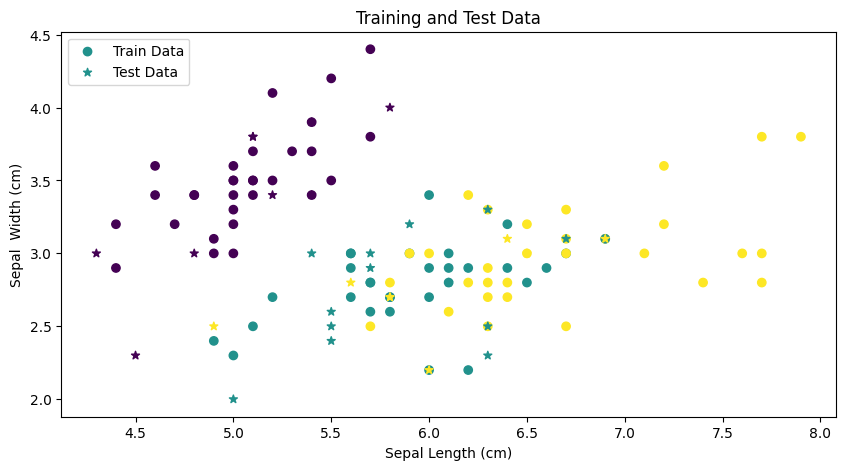

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap='viridis', label='Train Data')
ax.scatter(X_test[:,0], X_test[:,1], c=Y_test, cmap='viridis', marker="*", label='Test Data')
ax.set_title('Training and Test Data')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal  Width (cm)')
ax.legend(loc='upper left', scatterpoints=1)
plt.show()

### Working towards a `KNN` class
The goal is to define a `KNN` class. The class uses any value of K, chooses any distance metric and finds the nearest neighbours for new data points to make predictions. 

#### Computing pairwise Euclidean Distances
Goal: get an array `a` of shape `(30,90)`, where each row represent a test point, and each clumn represents a training point where `a[i, j]` contains the distance between test point `i` and train point `j`.

In [25]:
# Step 1: reshape by inserting new axes
X_test_reshaped = X_test[:,None,:]
X_test_reshaped.shape

(30, 1, 2)

In [26]:
X_train_reshaped = X_train[None,:,:]
X_train_reshaped.shape

(1, 90, 2)